In [1]:
import gcs
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
montecarloindex=9
montecarlokey="monte-carlo-"+str(montecarloindex).zfill(3)
GCname="NGC7078"
MWpotential="pouliasis2017pii-GCNBody"

In [3]:
gcs.path_handler.MonteCarloObservables(GCname)
RAes,DECes,Rsunes,RVes,mualphaes,mu_deltaes,Masses,rh_mes=\
    gcs.extractors.MonteCarloObservables.extract_GC_observables(gcs.path_handler.MonteCarloObservables(GCname),montecarloindex)

In [4]:
# how can I get the slope for describing the mass and radius of these sub halos from moliné? 
rise=np.log10(1e9)-np.log10(1e4)
run=np.log10(2.15e2) - np.log10(1.3e0)
slope=rise/run
# find the y-intercept
x1,y1= 1.3e0,1e4
x2,y2 = 2.5e1,1e4
xA=3e0
xB=1.0e1
log_C1 = np.log10(y1) - slope * np.log10(x1)
C1 = 10**log_C1
log_C2 = np.log10(y2) - slope * np.log10(x2)
C2 = 10**log_C2
log_CA= np.log10(y1) - slope * np.log10(xA)
log_CB= np.log10(y2) - slope * np.log10(xB)
CA = 10**log_CA
CB = 10**log_CB
eq1 = lambda x: C1 * x**slope
eq2 = lambda x: C2 * x**slope
eqA = lambda x: CA * x**slope
eqB = lambda x: CB * x**slope
r = np.logspace(0,3)
M1 = eq1(r)
M2 = eq2(r)
MA = eqA(r)
MB = eqB(r)

In [6]:
# get mass intercept 
Masses = [1e5,1e6,1e7]
rAs, rBs = [], []
for i in range(len(Masses)):
    rAs.append(np.power(Masses[i] / CA , 1/slope))
    rBs.append(np.power(Masses[i] / CB , 1/slope))

rAs = np.array(rAs)
rBs = np.array(rBs)
print(rAs)
print(rBs)

[ 8.33336254 23.14831043 64.30108768]
[ 27.77787514  77.16103475 214.33695895]


Text(0.5, 1.0, 'eye-balling the Moliné et al 2017 from Bonaca et al 2019')

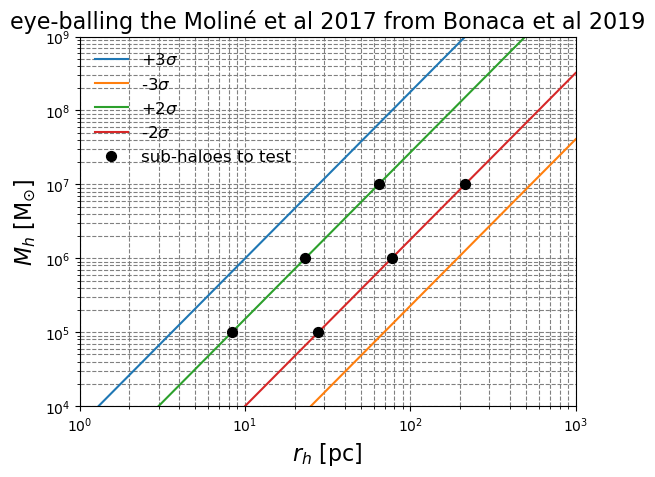

In [7]:
ylim=[1e4,1e9]
xlim=[1e0,1e3]
fig,axis=plt.subplots() 
axis.plot(r,M1,label=r"+3$\sigma$")
axis.plot(r,M2,label=r"-3$\sigma$")
axis.plot(r,MA,label=r"+2$\sigma$")
axis.plot(r,MB,label=r"-2$\sigma$")

axis.scatter(rAs,Masses,marker="o",color="black",s=50,zorder=10,label="sub-haloes to test")
axis.scatter(rBs,Masses,marker="o",color="black",s=50,zorder=10)

axis.set_xscale("log")
axis.set_yscale("log")
axis.set_ylim(ylim)
axis.set_xlim(xlim)
axis.grid(True,which="both",linestyle="--",color="gray")

axis.legend(frameon=False,fontsize=12)

axis.set_xlabel(r"$r_{h}$ [pc]",fontsize=16)
axis.set_ylabel(r"$M_{h}$ [M$_{\odot}$]",fontsize=16)
axis.set_title("eye-balling the Moliné et al 2017 from Bonaca et al 2019",fontsize=16)

In [8]:
plummerAs=np.power(np.power(2,2/3) -1 ,1/2) * (np.sqrt(2)+1) * rAs
plummerBs=np.power(np.power(2,2/3) -1 ,1/2) * (np.sqrt(2)+1) * rBs

In [9]:
def menc_plummer(r, M, a):
    return M * (r**3)/((r**2 + a**2)**(3/2))
def menc_hernquist(r, M, a):
    x= r/a
    return M * (x**2)/((1+x)**2)


Text(0.5, 0, '$r$')

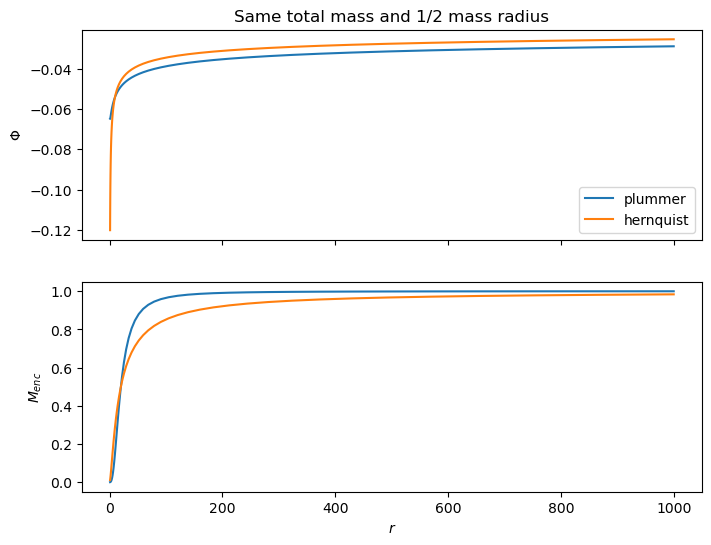

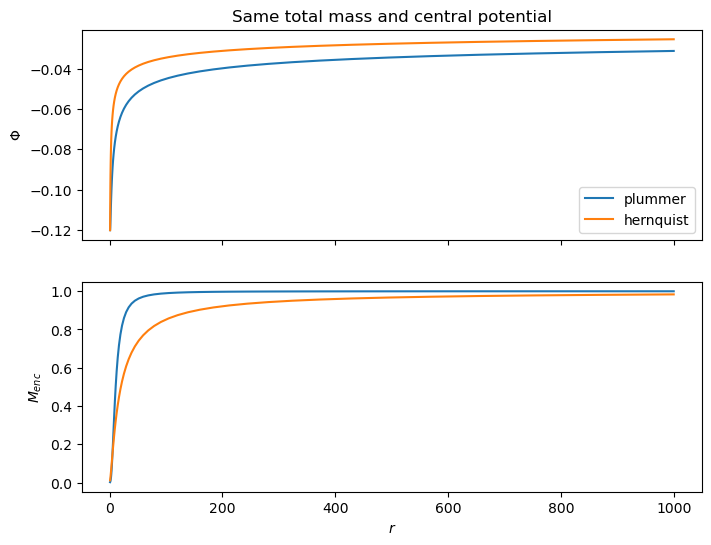

In [10]:
# inspect the differences in the profiles
ii=0
plummer = plummerAs[ii]
hernquist = rAs[ii]
rs = np.linspace(0,2*plummer)
plum = -np.power(rs**2 + plummer**2,-1/2) 
hern = -1/(rs + hernquist)
fig,axis=plt.subplots(2,1,figsize=(8,6),sharex=True)
axis[0].plot(r,plum,label="plummer")
axis[0].plot(r,hern,label="hernquist")
axis[0].legend()
axis[1].plot(r,menc_plummer(r,1,plummer),label="plummer")
axis[1].plot(r,menc_hernquist(r,1,hernquist),label="hernquist")
axis[0].set_title("Same total mass and 1/2 mass radius")
axis[0].set_ylabel(r"$\Phi$")
axis[1].set_ylabel(r"$M_{enc}$")
axis[1].set_xlabel(r"$r$")


### NOW USE THE SAME SCALE PARAMETER FOR THE SAME CENTRAL POTENTIAL 
ii=0
plummer = plummerAs[ii]
hernquist = rAs[ii]
rs = np.linspace(0,2*plummer)
plum = -np.power(rs**2 + hernquist**2,-1/2) 
hern = -1/(rs + hernquist)
fig,axis=plt.subplots(2,1,figsize=(8,6),sharex=True)
axis[0].plot(r,plum,label="plummer")
axis[0].plot(r,hern,label="hernquist")
axis[0].legend()
axis[1].plot(r,menc_plummer(r,1,hernquist),label="plummer")
axis[1].plot(r,menc_hernquist(r,1,hernquist),label="hernquist")
axis[0].set_title("Same total mass and central potential")
axis[0].set_ylabel(r"$\Phi$")
axis[1].set_ylabel(r"$M_{enc}$")
axis[1].set_xlabel(r"$r$")

## Note

- Bonaca presents the results from Moliné using hernquist profiles for the subhalo masses. 
- I do not have hernquist implemented in tstrippy
- Thus, I will just use a plummer sphere
- originally, I thought about how to adapt the hernquist value to plummers
- I thought about equating the total mass and the half mass radius
- however, for *gapology* I think the important values are the **central** potential and the total mass
- I think the shapes of the profiles (i.e. density power slopes) are less important. 
- The hernquist has a higher central potential if they have the same half mass radii. 
- So instead of using the same half mass radii, I will use the same central potential
- with the same central potential, the scale parameters are the same


In [13]:
fname = "sub_halo_mass_radius.txt"
f=open(fname,"w")
f.write("# Mass, Radius\n")
f.write("# M_sun, pc\n")
for i in range(len(Masses)):
    f.write(f"{Masses[i]} {rAs[i]}\n")
    f.write(f"{Masses[i]} {rBs[i]}\n")
f.close()